# Assessing Market Opportunities for Alpaca Wool Scarves - Interpreting Forecasting Results

In this activity, you’ll interpret the time series forecasting results of the Google Trends data about the market demand of alpaca wool scarves in Canada and Uruguay. The purpose will be to validate market opportunities to help the Aymara indigenous people in Bolivia export alpaca wool scarves to different countries or regions.

You’ll continue collaborating with the International Co-operative Alliance. But now, you’ll use Prophet to validate prospective market opportunities.

## Instructions

1. Open Google Colab and import the provided notebook.

2. Execute the code cells in "Step 2" to set-up the notebook, prepare the data, and use Prophet for time series forecasting.

3. Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters.

4. Analyze the forecast results by using Panda's `plot` function to plot the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

5. Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots.


## Step 2: Notebook Set Up, Data Preparation and Time Series Forecasting

### Notebook Set Up

In [1]:
# Install the required libraries
!pip install hvplot
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 13.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from prophet import Prophet

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

### Data Loading

In [3]:
# Upload the scarf-google-trends-data.csv file
from google.colab import files
uploaded = files.upload()

Saving scarf-google-trends-data.csv to scarf-google-trends-data.csv


In [28]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
df_alpaca = pd.read_csv("scarf-google-trends-data.csv")

# Review the DataFrame
df_alpaca.head()

,week,canada,uruguay
0,11/8/15,74,17
1,11/15/15,81,17
2,11/22/15,94,17
3,11/29/15,92,0
4,12/6/15,87,18


### Plotting the general trends

In [52]:
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

# Plot the general tredns using hvPlot
df_alpaca.hvplot() 

Output hidden; open in https://colab.research.google.com to view.

### Data Preparation


In [53]:
# Create a DataFrame for Canada to include the week and canada columns
df_canada = df_alpaca[["week", "canada"]]

# Rename the columns to the Prophet model syntax 
df_canada = df_canada.rename(columns={"week":"ds", "canada":"y"})

# Review the Canada DataFrame
df_canada.head()

,ds,y
0,11/8/15,74
1,11/15/15,81
2,11/22/15,94
3,11/29/15,92
4,12/6/15,87


In [54]:
# Create a DataFrame for Uruguay to include the week and uruguay columns
df_uruguay = df_alpaca[["week", "uruguay"]]

# Rename the columns to the Prophet model syntax 
df_uruguay = df_uruguay.rename(columns={"week":"ds", "uruguay":"y"})

# Review the Uruguay DataFrame
df_uruguay.head()

,ds,y
0,11/8/15,17
1,11/15/15,17
2,11/22/15,17
3,11/29/15,0
4,12/6/15,18


### Create two Prophet models, one for each country

In [55]:
# Create a Prophet model for Canada
model_canada = Prophet()

In [56]:
# Create a Prophet model for Uruguay
model_uruguay = Prophet()

### Fit the Prophet models

In [57]:
# Fit the Canada Prophet model
model_canada.fit(df_canada)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6z31mhml/u_com9ca.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6z31mhml/4ri54xlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20033', 'data', 'file=/tmp/tmp6z31mhml/u_com9ca.json', 'init=/tmp/tmp6z31mhml/4ri54xlh.json', 'output', 'file=/tmp/tmplh385wbz/prophet_model-20220915005344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:53:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
# Fit the Uruguay Prophet model
model_uruguay.fit(df_uruguay)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6z31mhml/590o_cy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6z31mhml/hyyjkktl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9992', 'data', 'file=/tmp/tmp6z31mhml/590o_cy9.json', 'init=/tmp/tmp6z31mhml/hyyjkktl.json', 'output', 'file=/tmp/tmpzzcy05m7/prophet_model-20220915005347.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:53:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:53:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### Use the `make_future_dataframe` function to forecast one year of trend dates

In [59]:
# Forecast one year of weekly future trends data for Canada 
future_canada = model_canada.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_canada DataFrame
future_canada.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


In [60]:
# Forecast one year of weekly future trends data for Uruguay 
future_uruguay = model_uruguay.make_future_dataframe(periods=52, freq="W")

# Display the last five rows of the future_uruguay DataFrame
future_uruguay.tail()

,ds
307,2021-09-26
308,2021-10-03
309,2021-10-10
310,2021-10-17
311,2021-10-24


### Predict the future trends data by using the `predict` method for both the Canada and Uruguay models. 

In [61]:
# Make predictions for Canada using the future_canada DataFrame
forecast_canada = model_canada.predict(future_canada)

# Display the first five rows of the forecast_canada DataFrame
forecast_canada.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,46.024000,68.669545,80.847547,46.024000,46.024000,28.538662,28.538662,28.538662,28.538662,28.538662,28.538662,0.0,0.0,0.0,74.562662
1,2015-11-15,45.927797,72.349352,85.085719,45.927797,45.927797,32.938599,32.938599,32.938599,32.938599,32.938599,32.938599,0.0,0.0,0.0,78.866395
2,2015-11-22,45.831593,75.866077,87.838707,45.831593,45.831593,36.030354,36.030354,36.030354,36.030354,36.030354,36.030354,0.0,0.0,0.0,81.861947
3,2015-11-29,45.735390,78.324304,90.595787,45.735390,45.735390,38.872431,38.872431,38.872431,38.872431,38.872431,38.872431,0.0,0.0,0.0,84.607820
4,2015-12-06,45.639186,81.344097,93.824912,45.639186,45.639186,41.706148,41.706148,41.706148,41.706148,41.706148,41.706148,0.0,0.0,0.0,87.345334


In [62]:
# Make predictions for Uruguay using the future_uruguay DataFrame
forecast_uruguay = model_uruguay.predict(future_uruguay)

# Display the first five rows of the forecast_uruguay DataFrame
forecast_uruguay.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-08,33.346600,8.760155,43.935772,33.346600,33.346600,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,0.0,0.0,0.0,26.263758
1,2015-11-15,33.301427,6.283525,40.234020,33.301427,33.301427,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,0.0,0.0,0.0,22.953498
2,2015-11-22,33.256253,0.314196,35.174236,33.256253,33.256253,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,0.0,0.0,0.0,17.360915
3,2015-11-29,33.211080,-3.561823,31.187269,33.211080,33.211080,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,0.0,0.0,0.0,13.733975
4,2015-12-06,33.165907,-4.192175,33.485776,33.165907,33.165907,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,0.0,0.0,0.0,14.693208


## Step 3: Plot Prophet’s predictions by using the `plot` function. Pass the forecasts for Canada and Uruguay, respectively, as the parameters

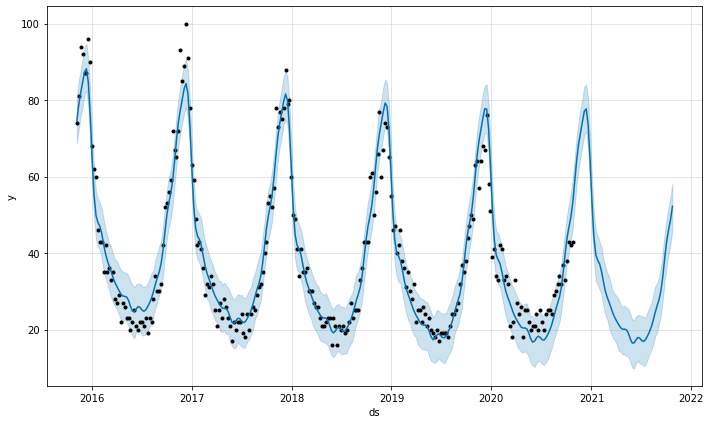

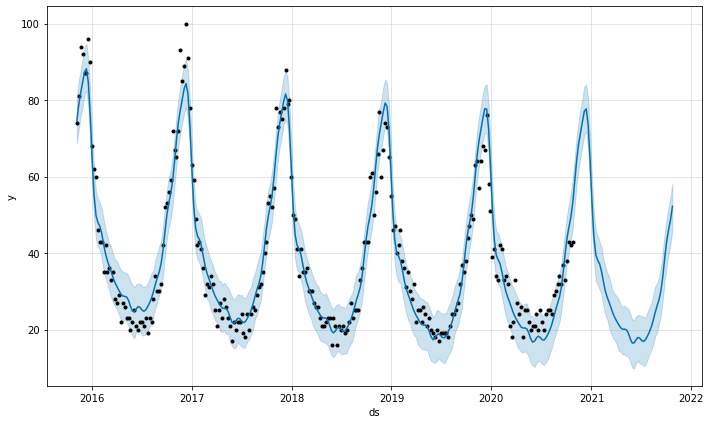

In [63]:
# Plot the Prophet predictions for Canada 
model_canada.plot(forecast_canada)

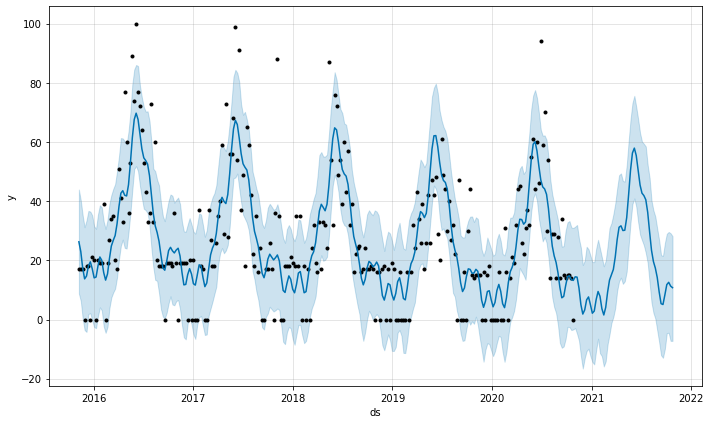

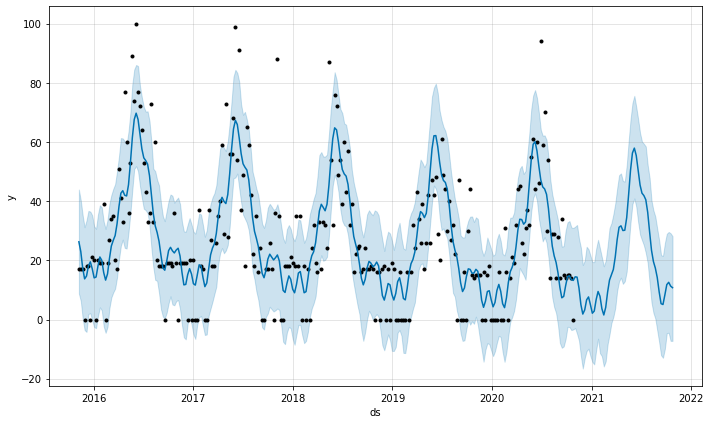

In [64]:
# Plot the Prophet predictions for Uruguay 
model_uruguay.plot(forecast_uruguay)

## Step 4: Analyze the forecast results by using Panda's `plot` function to plot the forecast DataFrame's “yhat”, “yhat_lower”, and “yhat_upper” columns for the Canadian and Uruguay models. Set the “ds” column as the DataFrame index before creating these plots.

In [65]:
# Set the index in the forecast_canada DataFrame to the ds datetime column 
forecast_canada = forecast_canada.set_index('ds')
# Display the forecast_canada DataFrame
forecast_canada

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,46.024000,68.669545,80.847547,46.024000,46.024000,28.538662,28.538662,28.538662,28.538662,28.538662,28.538662,0.0,0.0,0.0,74.562662
2015-11-15,45.927797,72.349352,85.085719,45.927797,45.927797,32.938599,32.938599,32.938599,32.938599,32.938599,32.938599,0.0,0.0,0.0,78.866395
2015-11-22,45.831593,75.866077,87.838707,45.831593,45.831593,36.030354,36.030354,36.030354,36.030354,36.030354,36.030354,0.0,0.0,0.0,81.861947
2015-11-29,45.735390,78.324304,90.595787,45.735390,45.735390,38.872431,38.872431,38.872431,38.872431,38.872431,38.872431,0.0,0.0,0.0,84.607820
2015-12-06,45.639186,81.344097,93.824912,45.639186,45.639186,41.706148,41.706148,41.706148,41.706148,41.706148,41.706148,0.0,0.0,0.0,87.345334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,34.908143,32.940281,45.293094,34.555600,35.295676,3.852499,3.852499,3.852499,3.852499,3.852499,3.852499,0.0,0.0,0.0,38.760642
2021-10-03,34.902214,36.446228,49.236242,34.537648,35.303559,8.185657,8.185657,8.185657,8.185657,8.185657,8.185657,0.0,0.0,0.0,43.087871
2021-10-10,34.896286,39.652253,52.106701,34.520186,35.316357,11.228147,11.228147,11.228147,11.228147,11.228147,11.228147,0.0,0.0,0.0,46.124433


In [66]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period 
hv.extension('bokeh')
forecast_canada[['yhat','yhat_lower','yhat_upper']].iloc[-52:,:].plot()

Output hidden; open in https://colab.research.google.com to view.

In [67]:
# Set the index in the forecast_uruguay DataFrame to the ds datetime column 
forecast_uruguay = forecast_uruguay.set_index('ds')

# Display the forecast_uruguay DataFrame
forecast_uruguay

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2015-11-08,33.346600,8.760155,43.935772,33.346600,33.346600,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,-7.082842,0.0,0.0,0.0,26.263758
2015-11-15,33.301427,6.283525,40.234020,33.301427,33.301427,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,-10.347929,0.0,0.0,0.0,22.953498
2015-11-22,33.256253,0.314196,35.174236,33.256253,33.256253,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,-15.895338,0.0,0.0,0.0,17.360915
2015-11-29,33.211080,-3.561823,31.187269,33.211080,33.211080,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,-19.477105,0.0,0.0,0.0,13.733975
2015-12-06,33.165907,-4.192175,33.485776,33.165907,33.165907,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,-18.472699,0.0,0.0,0.0,14.693208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,19.491152,-9.900616,25.834756,19.490858,19.491457,-11.162485,-11.162485,-11.162485,-11.162485,-11.162485,-11.162485,0.0,0.0,0.0,8.328667
2021-10-03,19.446060,-4.590411,28.972186,19.445757,19.446375,-7.660300,-7.660300,-7.660300,-7.660300,-7.660300,-7.660300,0.0,0.0,0.0,11.785760
2021-10-10,19.400968,-4.502262,29.593670,19.400654,19.401300,-6.828023,-6.828023,-6.828023,-6.828023,-6.828023,-6.828023,0.0,0.0,0.0,12.572944


In [68]:
# Plot predictions for our forecast_uruguay DataFrame for the 52 week period 
hv.extension('bokeh')
forecast_uruguay[['yhat','yhat_lower','yhat_upper']].iloc[-52:,:].plot()

Output hidden; open in https://colab.research.google.com to view.

## Step 5: Use the `plot_component` function from the Prophet models to analyze the patterns of the Google Trends times series data for the Canada and Uruguay models. Be sure to reset the index by converting “ds” back to a column before creating these plots.

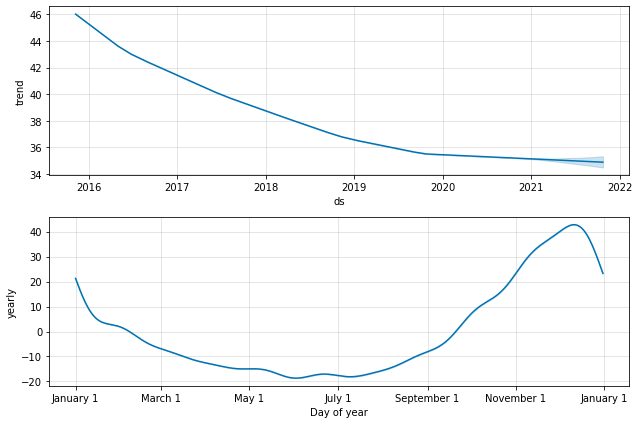

In [69]:
# Reset the index in the forecast_canada DataFrame
forecast_canada = forecast_canada.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame
fig_canada = model_canada.plot_components(forecast_canada)


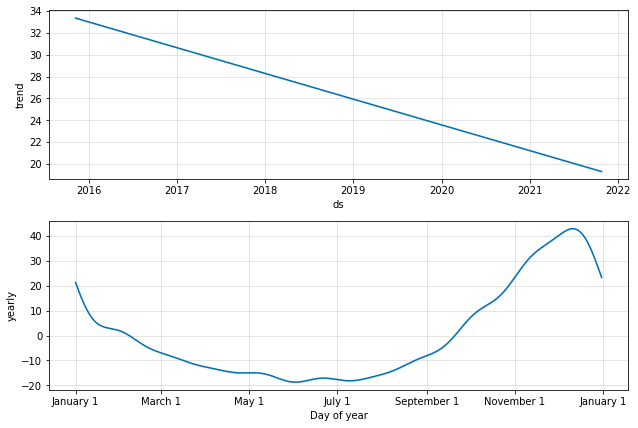

In [70]:
# Reset the index in the forecast_uruguay DataFrame
forecast_uruguay = forecast_uruguay.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_uruguay DataFrame
fig_uruguay = model_canada.plot_components(forecast_uruguay)